In [16]:
import pandas as pd 
import numpy as np

import umap.umap_ as umap

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import sklearn.cluster as cluster


In [5]:
user = pd.read_csv("../MIND_large/csv/user_features.csv", index_col=0)
user.head(2)

,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,foodanddrink,lifestyle,sports,travel,weather,middleeast,kids,games,median
0,U1,0.444444,0.236111,0.111111,0.083333,0.097222,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333
1,U100,0.162791,0.046512,0.046512,0.046512,0.023256,0.000000,0.046512,0.069767,0.116279,0.116279,0.209302,0.116279,0.0,0.0,0.0,0.0,0.0,0.208333


In [6]:
from clustering_modules import create_UMAP_embeddings

In [8]:
metrics = ['euclidean','cosine','hellinger']
embeddings = [create_UMAP_embeddings(2, user.iloc[:,1:], metric, 100, 0.1) for metric in metrics]
embeddings[1]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


array([[-3.6881034, -0.0199976],
       [ 0.8239037, -2.9377902],
       [-3.0628803, -0.7324859],
       ...,
       [ 0.6324535, -2.1861615],
       [ 0.4087948, -3.4558737],
       [-2.9850469,  0.7796208]], dtype=float32)

In [11]:
fname = "../MIND_large/csv/user_embeddings_"
for index, item in enumerate(metrics):
    print(index, item)
    np.save(fname + f'{item}.npy', embeddings[index])

0 euclidean
1 cosine
2 hellinger


In [12]:
kmeans_labels = [cluster.KMeans(n_clusters=10,n_init='auto').fit_predict(embedding) for embedding in embeddings]

In [23]:
def plot_user_distance(embeddings, kmeans, distance_metric):
    cmap = matplotlib.colormaps['plasma']

    # Create the grid to put plots on.
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    # Flatten the axes for easier list indexing.
    axs = axs.flatten()

    # Unpack the labels from the lists.
    eu_km, cos_km, he_km = kmeans_labels
    
    # Create euclidean distance metric scatterplots assigned to the top row.
    axs[0].scatter(embeddings[0][:, 0],embeddings[0][:, 1], alpha = 0.5, s=1, c=eu_km, cmap=cmap)
    axs[1].scatter(embeddings[1][:, 0],embeddings[1][:, 1], alpha = 0.5, s=1, c=cos_km, cmap=cmap)
    axs[2].scatter(embeddings[2][:, 0],embeddings[2][:, 1], alpha = 0.5, s=1, c=he_km, cmap=cmap)
    axs[0].set_title(f'{distance_metric[0]}')
    axs[1].set_title(f'{distance_metric[1]}')
    axs[2].set_title(f'{distance_metric[2]}')

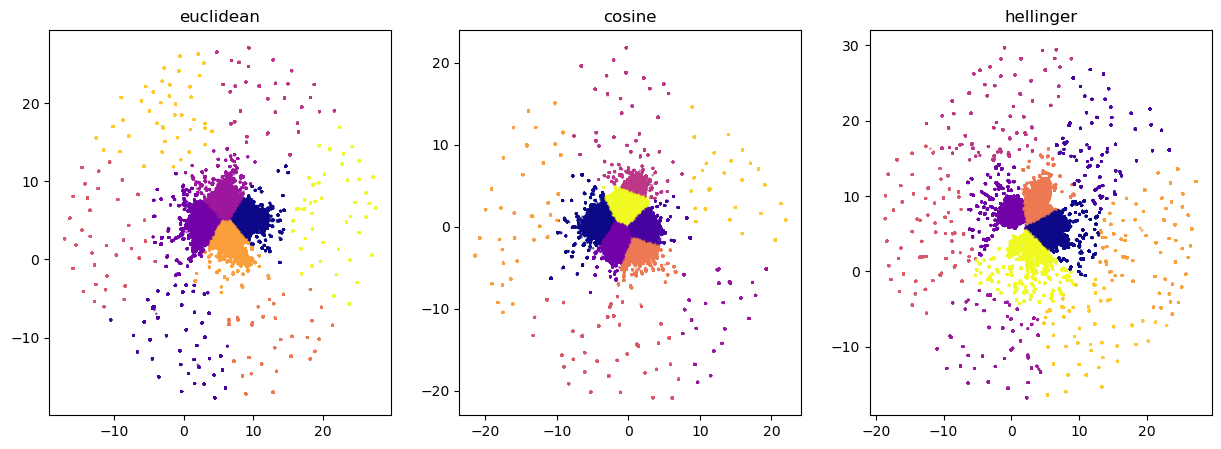

In [24]:
plot_user_distance(embeddings, kmeans_labels, metrics)

In [ ]:
fig, ax = plt.subplots(1,3)